# Homework 17.1

# Caelan Osman 

# March 20, 2022

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import OPTICS

## Exercise 17.1

### Part 1

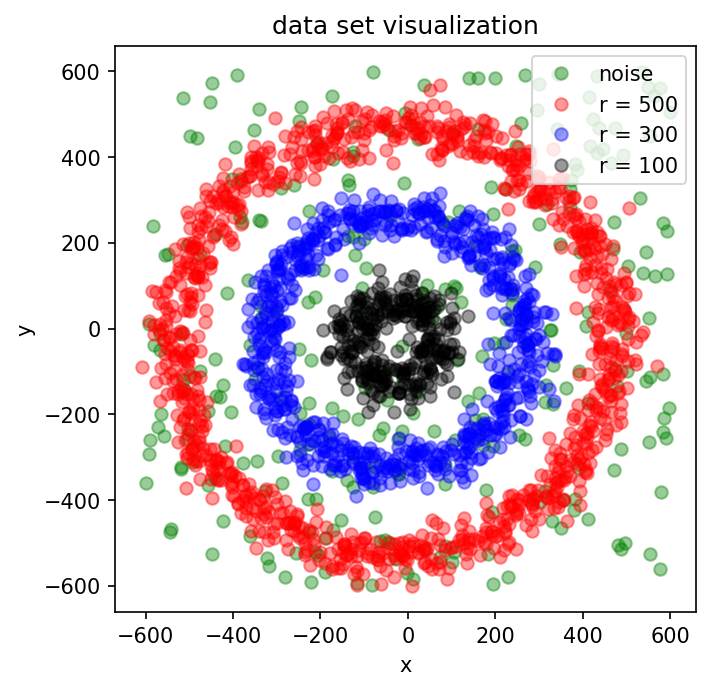

In [22]:
def pointsInCircum(r, n=100):

    # return n (x, y) coordinates in circle of radius r
    return np.array([[np.cos(2*np.pi/n*x)*r+np.random.normal(-30,30), np.sin(2*np.pi/n*x)*r+np.random.normal(-30,30)] for x in range(1, n+1)])

def concentric_circles_noise():
    # raidus values
    r_vals = [500, 300, 100]
    # draws to make
    num_points = [1000, 700, 300]

    # intialize datset with some noise
    data_set = np.random.uniform(low=-600, high=600, size=(300, 2))

    # stack all concentric circiles and datasets together
    for r, num in zip(r_vals, num_points):

        data_set = np.vstack((data_set, pointsInCircum(r, n=num)))

    return data_set

def vis_data_set():

    # visualizes the dataset from above
    data_set = concentric_circles_noise()
    fig = plt.figure(figsize=(5, 5))
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(data_set[:300, 0], data_set[:300, 1], 'go', alpha=0.4, label='noise')
    ax.plot(data_set[300:1300, 0], data_set[300:1300, 1], 'ro', alpha=0.4, label= 'r = 500')
    ax.plot(data_set[1300:2000, 0], data_set[1300:2000, 1], 'bo', alpha=0.4, label= 'r = 300')
    ax.plot(data_set[2000:, 0], data_set[2000:, 1], 'ko', alpha=0.4, label='r = 100')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('data set visualization')
    plt.show()

vis_data_set()

### part 2

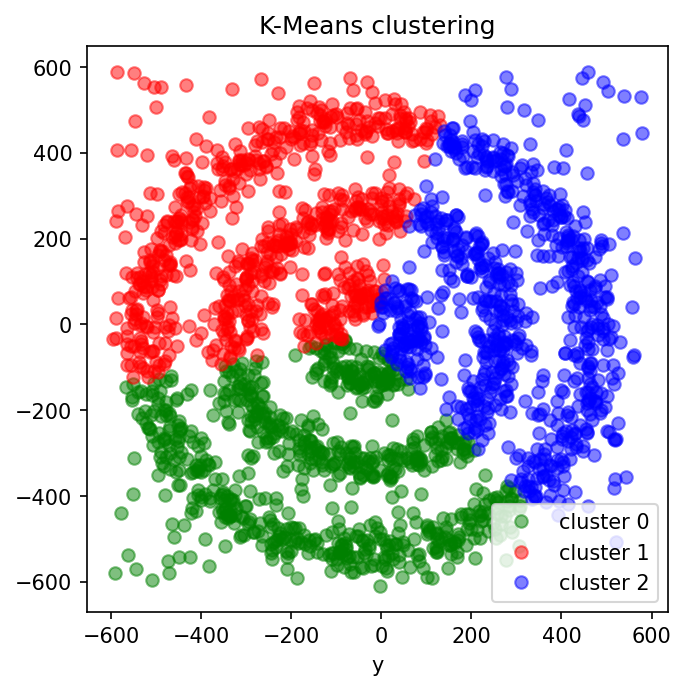

In [23]:
def sklearn_kmeans(k=3):

    data_set = concentric_circles_noise()

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_set)
    # labels = kmeans.predict(data_set)
    labels = kmeans.fit_predict(data_set)

    mask0 = labels == 0
    mask1 = labels == 1
    mask2 = labels == 2

    fig = plt.figure(figsize=(5, 5))
    fig.set_dpi(150)
    ax = fig.add_subplot(111)

    ax.plot(data_set[mask0, 0], data_set[mask0, 1], 'go', alpha=0.5, label='cluster 0' )
    ax.plot(data_set[mask1, 0], data_set[mask1, 1], 'ro', alpha=0.5, label='cluster 1' )
    ax.plot(data_set[mask2, 0], data_set[mask2, 1], 'bo', alpha=0.5, label='cluster 2' )
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_xlabel('y')
    ax.set_title('K-Means clustering')
    plt.show()


    return

sklearn_kmeans()


### Part 3

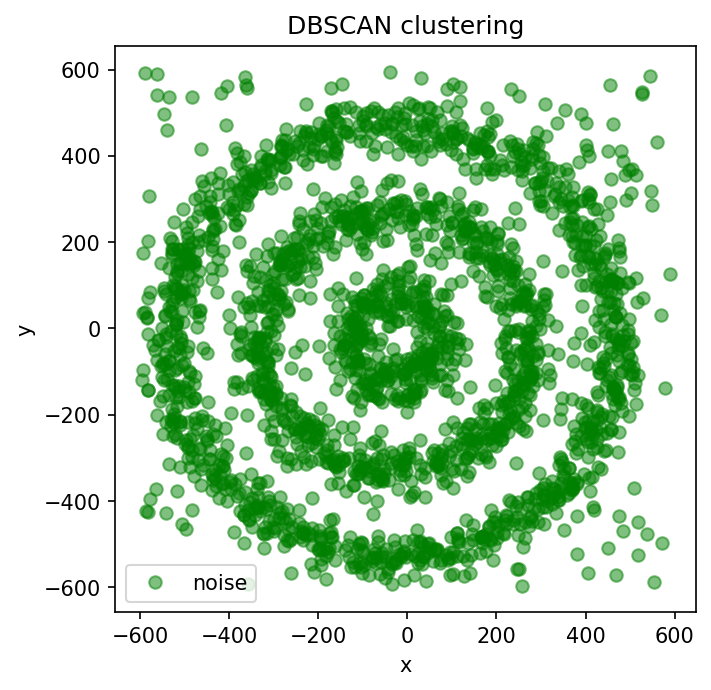

In [24]:
def sklearn_dbscan_naive():

    data_set = concentric_circles_noise()

    dbscan = DBSCAN(eps=0.1, min_samples=3)

    labs = dbscan.fit_predict(data_set)

    noise = labs == -1


    fig = plt.figure(figsize=(5, 5))
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(data_set[noise, 0], data_set[noise, 1], 'go', alpha=0.5, label='noise')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('DBSCAN clustering')

    return

sklearn_dbscan_naive()

According to the DBSCAN algorithm, every point gets classified as noise. 

### part 4

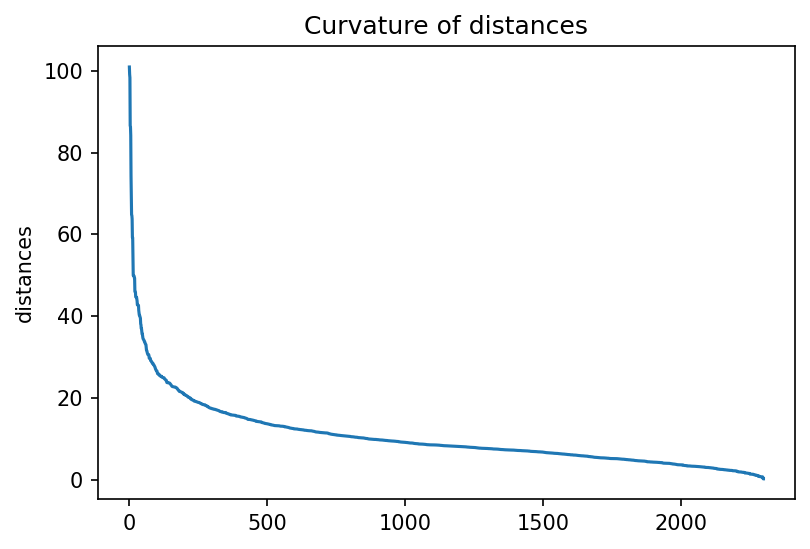

In [25]:
def find_eps():

    data_set = concentric_circles_noise()

    NN = NearestNeighbors(n_neighbors=2)
    nbrs = NN.fit(data_set)
    distances, indices = nbrs.kneighbors(data_set)
    dist = distances[:, 1]
    sorted_index = np.argsort(dist)[::-1]
    
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(dist[sorted_index])
    ax.set_ylabel('distances')
    ax.set_title('Curvature of distances')
    plt.show()

    return

find_eps()

As we can see, the best epsilon is about 33. 

### Part 5

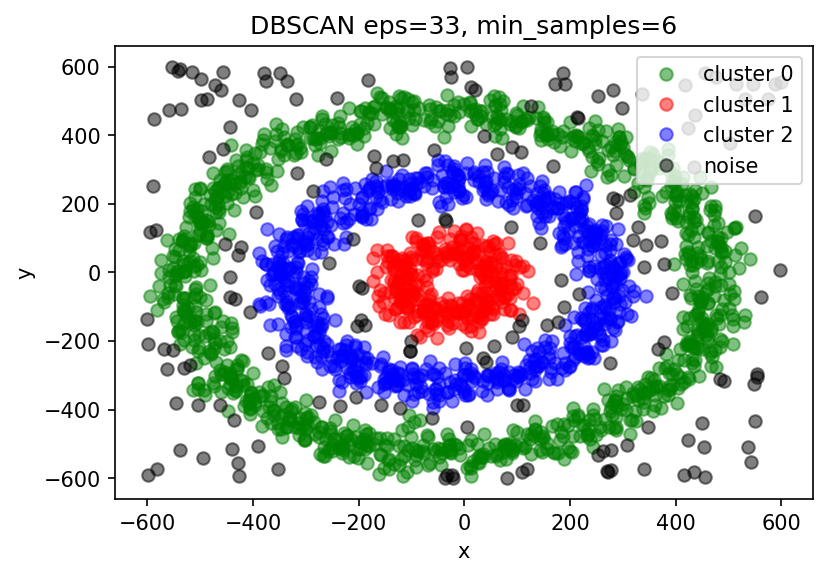

In [26]:
def sklearn_dbscan(eps=33, min_samples=6):

    # get data set
    data_set = concentric_circles_noise()
    # fit and predict
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labs = dbscan.fit_predict(data_set)

    # now plot according to label
    noise = labs == -1
    lab0 = labs == 0
    lab1 = labs == 1
    lab2 = labs == 2
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(data_set[lab0, 0], data_set[lab0, 1], 'go', alpha=0.5, label='cluster 0')
    ax.plot(data_set[lab1, 0], data_set[lab1, 1], 'ro', alpha=0.5, label='cluster 1')
    ax.plot(data_set[lab2, 0], data_set[lab2, 1], 'bo', alpha=0.5, label='cluster 2')
    ax.plot(data_set[noise, 0], data_set[noise, 1], 'ko', alpha=0.5, label='noise')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    ax.set_title('DBSCAN eps={}, min_samples={}'.format(eps, min_samples))
    plt.show()

    return
sklearn_dbscan()

### Part 6

As we can see KMEANS clustered, but completely incorrectly, then the naive DBSCAN algorithm just labeled everything as noise. 
But once we correctly picked the parameters $\varepsilon$ and $\operatorname{minPts}$ then the DBSCAN algorithm did a fantastic job of clustering everything in the right way.  

## Exercise 17.2

### Part 1

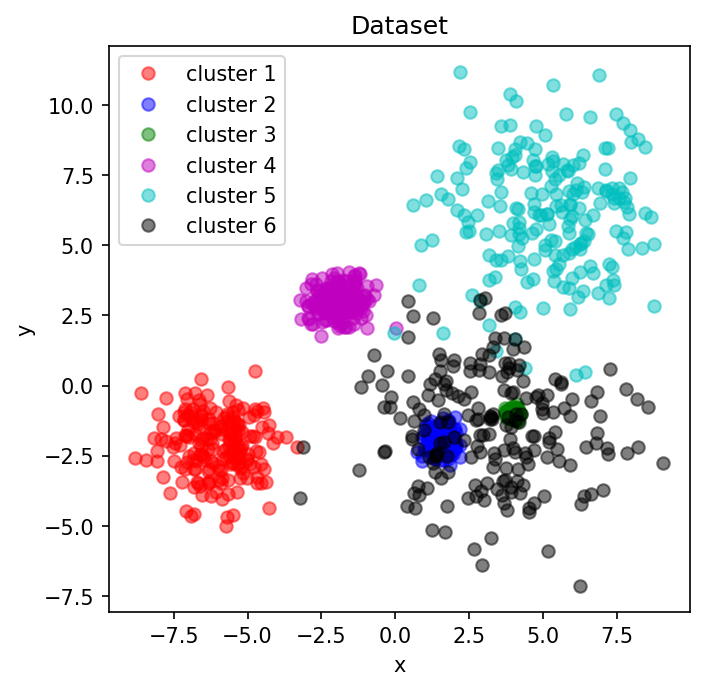

In [27]:
def create_data_set():
    X1=[-6, -2] + 1* np.random.randn(200, 2)
    X2=[1.5, -2] + .3 * np.random.randn(200, 2)
    X3=[4, -1] + .1 * np.random.randn(200, 2)
    X4=[-2, 3] + .5 * np.random.randn(200, 2)
    X5=[5, 6] + 2 * np.random.randn(200, 2)
    X6=[3, -1.5] + 2 * np.random.randn(200, 2)
    return np.vstack((X1, X2, X3, X4, X5, X6))

def vis_data():

    X = create_data_set()

    c1 = X[:200]
    c2 = X[200:400]
    c3 = X[400:600]
    c4 = X[600:800]
    c5 = X[800:1000]
    c6 = X[1000:1200]

    fig = plt.figure(figsize=(5, 5))
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(c1[:, 0], c1[:, 1], 'ro', alpha=0.5, label='cluster 1')
    ax.plot(c2[:, 0], c2[:, 1], 'bo', alpha=0.5, label='cluster 2')
    ax.plot(c3[:, 0], c3[:, 1], 'go', alpha=0.5, label='cluster 3')
    ax.plot(c4[:, 0], c4[:, 1], 'mo', alpha=0.5, label='cluster 4')
    ax.plot(c5[:, 0], c5[:, 1], 'co', alpha=0.5, label='cluster 5')
    ax.plot(c6[:, 0], c6[:, 1], 'ko', alpha=0.5, label='cluster 6')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Dataset')
    plt.show()



    return

vis_data()

### Part 2

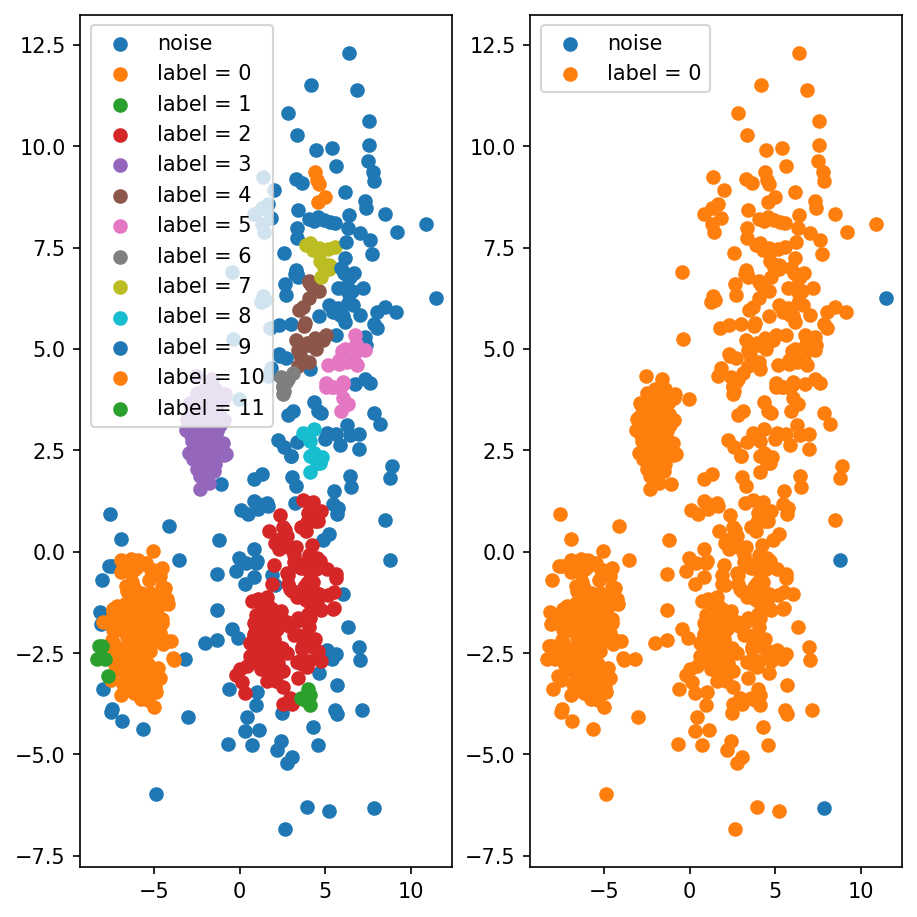

In [28]:
def dbscan_naive_2(): 

    fig, axs = plt.subplots(1, 2, figsize=(6, 6), constrained_layout=True)
    fig.set_dpi(150)
    # get data set
    data_set = create_data_set()
    for j, eps in enumerate([0.5, 2]):
        # fit and predict
        dbscan = DBSCAN(eps=eps)
        labs = dbscan.fit_predict(data_set)
        ax = axs[j]
        noise = labs == -1
        ax.scatter(data_set[noise, 0], data_set[noise, 1], label='noise')
        for i in range(np.max(labs) + 1):
            labcur = labs == i
            if sum(labcur) == 0:
                continue
            ax.scatter(data_set[labcur, 0], data_set[labcur, 1], label='label = {}'.format(i))
        ax.legend(loc='best')
    plt.show()

    return

dbscan_naive_2()

As we can see, the clusters are no where near correct. 

### Part 3 and 4

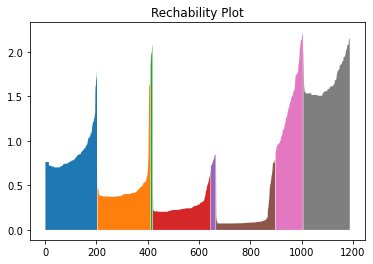

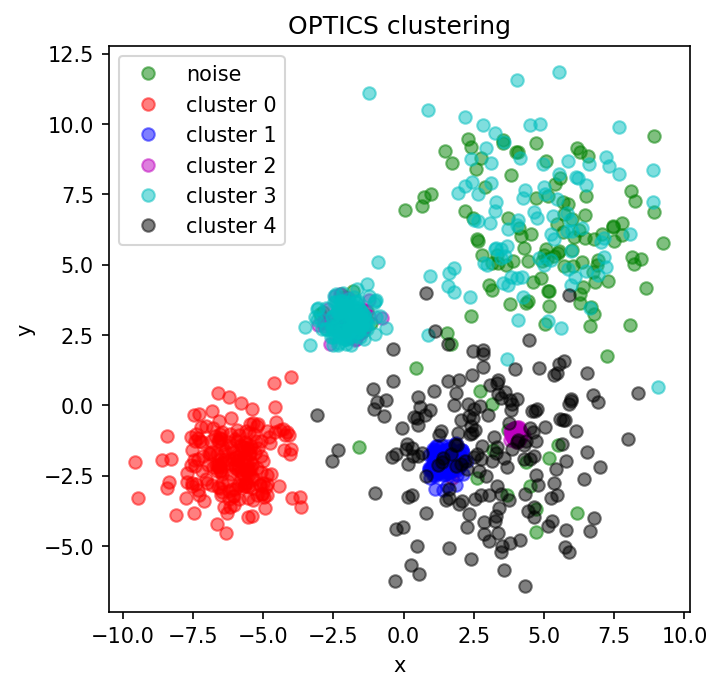

In [29]:
def sklearn_optics():

    data_set = create_data_set()

    optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
    optics.fit(data_set)
    reachability = optics.reachability_[optics.ordering_]
    labs = optics.labels_[optics.ordering_]


    line = []
    vals = []
    # reachability plot
    for i in range(1, len(labs)):
        if labs[i] == labs[i-1]:
            line.append(reachability[i])
            vals.append(i)
        else:
            plt.fill_between(vals, line)
            line = []
            vals = []

    plt.title('Rechability Plot')
    plt.show()

    # masks for plotting
    noise = labs==-1
    lab0 = labs == 0
    lab1 = labs == 1
    lab2 = labs == 2
    lab3 = labs == 3
    lab4 = labs == 4

    # clustering plot
    fig = plt.figure(figsize=(5, 5))
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(data_set[noise, 0], data_set[noise, 1], 'go', alpha=0.5, label='noise')
    ax.plot(data_set[lab0, 0], data_set[lab0, 1], 'ro', alpha=0.5, label='cluster 0')
    ax.plot(data_set[lab1, 0], data_set[lab1, 1], 'bo', alpha=0.5, label='cluster 1')
    ax.plot(data_set[lab2, 0], data_set[lab2, 1], 'mo', alpha=0.5, label='cluster 2')
    ax.plot(data_set[lab3, 0], data_set[lab3, 1], 'co', alpha=0.5, label='cluster 3')
    ax.plot(data_set[lab4, 0], data_set[lab4, 1], 'ko', alpha=0.5, label='cluster 4')
    ax.legend(loc='best')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('OPTICS clustering')
    plt.show()

    return

sklearn_optics()

The optics only was able to identify 5 of the 6 datasets. But overall it actually did really well. The optics algorithm had a hard time separating clusters 5 and 6 from the original dataset. 
This is due to the fact that optics has variable density whereas DBSCAN has a global density.

## Exercise 17.4

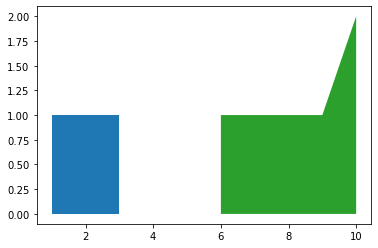

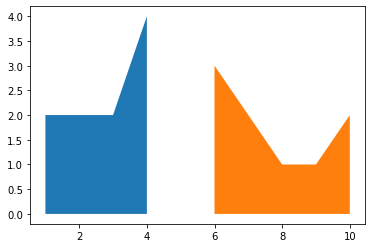

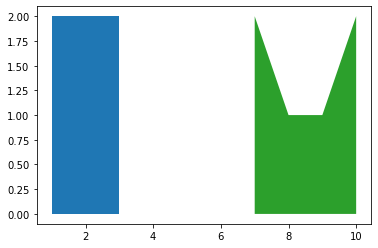

<Figure size 432x288 with 0 Axes>

In [30]:
def prob17_4():

    # set up dataset
    x_vals = np.array([1, 2, 1, 2, 3, 3, 3, 4, 4, 5, 7, 10, 10, 9, 10, 11, 9, 10, 11, 10]).reshape(-1, 1)
    y_vals = np.array([1, 1, 2, 2, 5, 9, 10, 10, 11, 10, 10, 9, 6, 5, 5, 5, 4, 4, 4, 3]).reshape(-1, 1)
    data_set = np.hstack((x_vals, y_vals))
    hyper_params = [(5, 2), (5, 4), (2, 4)]


    i = 0
    for eps, minPts in hyper_params:
        optics = OPTICS(min_samples=minPts, max_eps=eps, p=1)
        optics.fit(data_set)
        reachability = optics.reachability_[optics.ordering_]
        labs = optics.labels_[optics.ordering_]

        line = []
        vals = []
        for j in range(1, len(labs)):
            if labs[j] == labs[j-1]:
                line.append(reachability[j])
                vals.append(j)
            else:
                plt.fill_between(vals, line)
                line = []
                vals = []

        plt.show()

        i += 1

    plt.suptitle('Reachability plots')
    plt.show()

    return

prob17_4()

In [31]:
def helper():
    x_vals = np.array([1, 2, 1, 2, 3, 3, 3, 4, 4, 5, 7, 10, 10, 9, 10, 11, 9, 10, 11, 10]).reshape(-1, 1)
    y_vals = np.array([1, 1, 2, 2, 5, 9, 10, 10, 11, 10, 10, 9, 6, 5, 5, 5, 4, 4, 4, 3]).reshape(-1, 1)
    X = np.hstack((x_vals, y_vals))

    Alph = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T"]

    point_dict = dict() 
    alph_dict = dict()
    for coord, letter in zip (X, Alph):
        point_dict[tuple(coord)] = letter
        alph_dict[letter] = tuple(coord)


    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.set_xticks(np.arange(0, 13).astype(int))
    ax.set_yticks(np.arange(0, 13).astype(int))
    ax.plot(X[:, 0], X[:, 1], 'ko')
    ax.grid()
    plt.show()

    dbscan = DBSCAN(eps=2.1, min_samples=2, p=1)
    dbscan.fit(X)
    components = dbscan.components_
    core_pts = {point_dict[tuple(comp)] for comp in components}

    core_pts_list =sorted(list(core_pts))
    print('core points')
    for pt in core_pts_list:
        print(pt)


    labels = dbscan.labels_

    all_pts = set(Alph)
    noise = set()
    for j, label in enumerate(labels):
        if label == -1:
            noise.add(point_dict[tuple(X[j])])

    noise_list = sorted(list(noise))
    print('noise points')
    for pt in noise_list:
        print(pt)

    border = sorted(list(all_pts.difference(noise.union(core_pts))))
    print('border points')
    for pt in border:
        print(pt)



    return